## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [2]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(
    n_samples=1000, 
    n_redundant=0,
    n_features=2,
    n_clusters_per_class=1, 
    weights=[0.90], 
    random_state=12
)

In [6]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1,df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

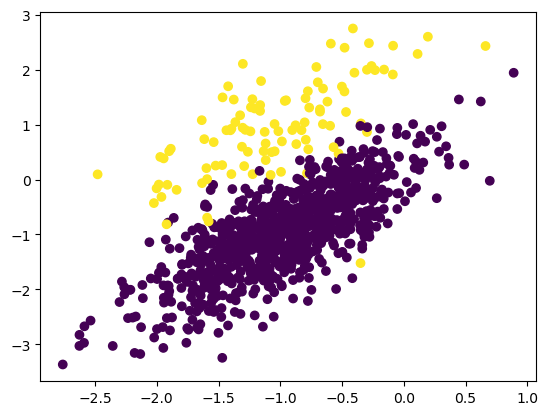

In [8]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [9]:
!pip install imblearn

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 1.7 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/12.8 MB 1.7 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/12.8 MB 1.7 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/12.8 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 3.1/12.8 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/12.8 MB 2.1 MB/s eta 0:00:05
   -------------- ------------------------- 4.7/12.8 MB 2.4 MB/s eta 0:00:04
   ---------------- ----------------------- 5.2/12.8 MB 2.5 MB/s eta 0:00:04
   ------------------ --------------------- 5.8/12.8 MB 2.5 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.8 MB 2.4 MB/s eta 0:00:03
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
## Transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [13]:
X.shape

(1800, 2)

In [14]:
y.shape

(1800,)

In [16]:
len(y[y == 0])

900

In [17]:
len(y[y == 1])

900

In [21]:
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)

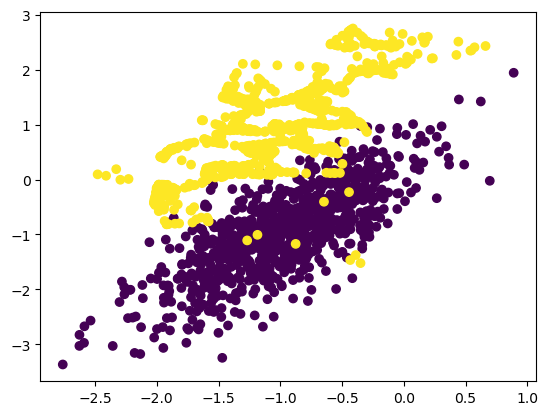

In [22]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])